In [858]:
import pandas as pd
import re
import numpy as np
import pycountry
pd.set_option('display.max_rows', None)
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'>Data Cleansing</p>
<hr style='color:white;'>

In [829]:
df = pd.read_csv('C:\\csv-data-collect\\job-data.csv',encoding='latin')

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>DUPLICATES</p>
<hr style='color:#BA704F;'>

In [830]:
df.duplicated().sum()

202

In [831]:
df.drop_duplicates(inplace=True)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Salary</p>
<hr style='color:#BA704F;'>

In [832]:
df['Salary'].replace(np.nan, "0",inplace=True)
#df.loc[df['Salary'] == "0"]

In [833]:
df.drop(df.loc[(df['Salary'] == 0) & (df['Job Type'] != 'Internship')].index,inplace=True)

In [834]:
def ConvertToIntger(string):
    Money_pattern = re.compile("["
                           u"GBP"
                           u"EUR"
                           u"K"
                           u"+"
                           u"*"
                           "]+"
                           , flags=re.UNICODE)
    return int(Money_pattern.sub(r'', string)) * 1000

df['Salary'] = df['Salary'].apply(ConvertToIntger)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Company</p>
<hr style='color:#BA704F;'>

In [835]:
df.drop(df.loc[df['Company'].isna()].index,inplace=True)

In [836]:
df.loc[df['Company'].isna()]

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities


<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Experience level</p>
<hr style='color:#BA704F;'>

In [837]:
df['Experience level'].isna().sum()

227

In [838]:
df['Experience level'].fillna('not specified',inplace=True)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Requirment of the company</p>
<hr style='color:#BA704F;'>

In [952]:
def GetJobsName(text):
    return text.split(',')
req_name_Ge_0 = []
for x in df['Requirment of the company '].apply(GetJobsName):
    for y in x:
        req_name_Ge_0.append(y)

req_name_df = pd.DataFrame(req_name_Ge_0)
req_name_df.rename(columns={0:"Requirment of the company"},inplace=True)
Indexies = req_name_df.loc[req_name_df['Requirment of the company'] ==''].index
req_name_df.drop(Indexies,inplace=True)
req_name_df = pd.DataFrame(req_name_df['Requirment of the company'].unique().tolist())
Tags_name_df = req_name_df.rename(columns={0:"Tags"})

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Job Title</p>
<hr style='color:#BA704F;'>

In [840]:
job__names = {
    "Data Science":[
        "Research Scientist",
        "Statistics and Probability",
        "Applied Scientist",
        "Decision Scientist"
    ],
    "Data engineer":[
        "Data Engineer Scientist",
        "Data Engineer",
        "IT Data Engineer",
    ],
    "Data analysis":[
        "Data Developer",
        "Data analysis",
        "Insight Analyst",
        "Data Analyst",
        "Marketing Analytics",
        "DB/ETL Developer",
        "Développeur ETL", 
        "Business Intelligence",
        "BI Developer",
        "BI Analyst"
    ],
    "AI":[
        "AI Engineer"
        "Principal Product Marketing Manager, AI & Mach",
        "Lead Machine Learning Engineer",
        "Machine Learning",
        "AI/ML",
        "ML Engineer",
        "Natural Language Processing",
        "MLOps Engineer",
        "NLP Scientist",
        "AI Product Owner",
        "ChatGPT Consultant",
        "AI Product Owner",
        "Computer Vision"
    ],
    "Big Data":[
        "Big Data Engineer",
        "Big Data",
        "Senior Big Data",
        "PySpark",
        "Cloud storage",
        "Cloud Data",
        "Cloud Engineer",
        "DevOps Engineer",
        "Technical Architect Databricks",
        "Data Modeler"
    ],
    "Developer":[
        "React Native",
        "HTML Developer"
        "HTML"
    ]
}

In [841]:
def find_job_title(text):
    Best_matched = None
    Best__Score = 0

    for job__name in job__names:
        for x in job__names[job__name]:
            score = fuzz.WRatio(text,x)
            if score > Best__Score:
                Best__Score = score
                Best_matched = job__name
    if Best__Score >= 86:
        return Best_matched
    else:
        return text


df['Job Title'] = df['Job Title'].apply(find_job_title)

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'> Data analysis & visualization</p>
<hr style='color:white;'>

<hr style='color:#BA704F;'>
<u style='color:#6C3428;font-size:20px;text-decoration: none;'>
  <li>identify the key trends in the job market for AI, DS, and Big Data?</li>
  <li>the most demanded skills and the most common job titles in these fields?</li>
  <li>How do you analyze the differences and similarities between job opportunities in AI, DS, and Big Data?</li>
</u>
<hr style='color:#BA704F;'>

<Axes: xlabel='Job Title'>

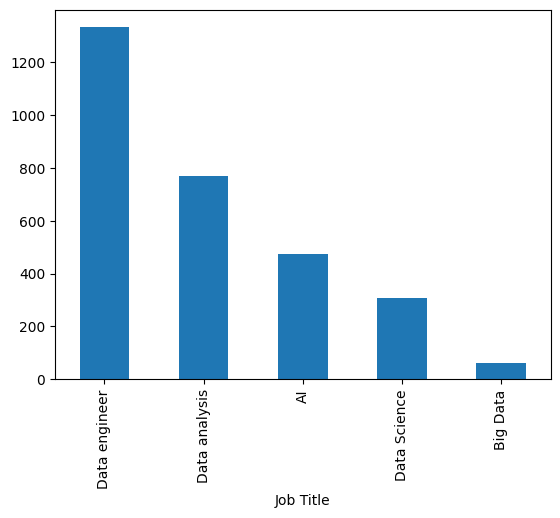

In [842]:
df['Job Title'].value_counts().sort_values(ascending=False).head().plot(kind = 'bar')

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>The highest paid domains.</p>
<hr style='color:#BA704F;'>

<Axes: >

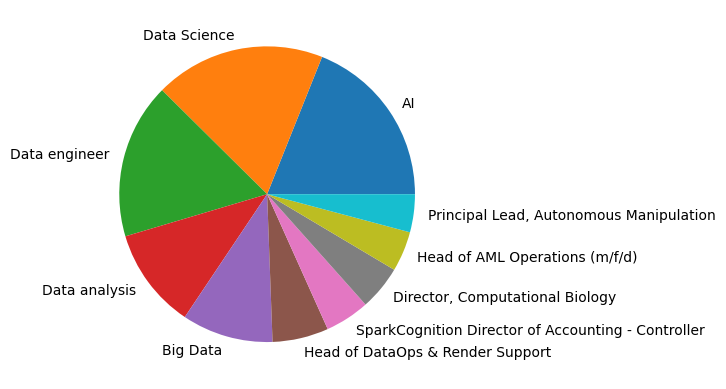

In [905]:
df.groupby('Job Title').apply(lambda x:x['Salary'].max()).sort_values(ascending=False).head(10).plot.pie()
# Check The Func working (Testing).
# df.loc[df['Job Title'] == 'Data analysis']['Salary'].max()

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Job Type Graph</p>
<hr style='color:#BA704F;'>

([<matplotlib.patches.Wedge at 0x24f5e764c10>,
 [Text(-1.096320269461012, 0.08989920338320195, 'Full Time'),
  Text(1.0957327614935846, -0.09679729019783234, 'Internship'),
  Text(1.0999782140093104, -0.0069230560367338715, 'Part Time')])

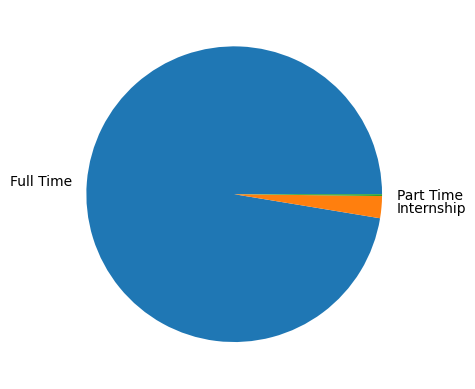

In [866]:
labels = df['Job Type'].value_counts().reset_index()['Job Type']
sizes = df['Job Type'].value_counts().reset_index()['count']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Experience level</p>
<hr style='color:#BA704F;'>

In [961]:
Experience_df = df['Experience level'].value_counts()
Experience_df['Senior-level']

1746

In [ ]:
labels = df['Job Type'].value_counts().reset_index()['Job Type']
sizes = df['Job Type'].value_counts().reset_index()['count']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'> Data <b><i>Modeling</i></b> & <b><i>Storage</i></b></p>
<hr style='color:white;'>

<hr style='color:#BA704F;'>
<u style='color:crimson;font-size:20px;text-decoration: none;'>
  <li>Entity-Relationship Model (ERM):</li>
  <li>Entity-Relationship Diagram (ERD):</li>
  <li>Insert into the database:</li>
</u>
<hr style='color:#BA704F;'>

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Requirment of the company Table (Tags)</p>
<hr style='color:#BA704F;'>

In [956]:
req_Table_List = []
for index,x in Tags_name_df.iterrows():
    index = index + 1
    req_Table_List.append({'id':index,'Name':x.Tags})

Tags_Table = pd.DataFrame(req_Table_List)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Requirment of the company Table (Tags)</p>
<hr style='color:#BA704F;'>

In [957]:
df

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Data analysis,"Richardson, TX, United States",Full Time,Entry-level,48000,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,Data analysis,"Ebène, Mauritius",Full Time,Entry-level,48000,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,AI,"South Jordan, UT, United States",Full Time,not specified,90000,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Data analysis,"Nonantola, Italy",Full Time,Entry-level,48000,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data engineer,"Arlington, VA, United States",Full Time,Mid-level,108000,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."
5,ServiceNow,Data Science,"Kirkland, Washington, United States",Full Time,Senior-level,184000,"Computer Science,Deep Learning,Industrial,Mach...","401(k) matching,Career development,Competitive..."
6,Natixis in Portugal,Data Science,"Porto, Portugal",Full Time,Entry-level,39000,"Banking,Data quality,Excel,Security,,","Gear,,,,"
7,NielsenIQ,Data analysis,"Bangkok, Thailand",Internship,Entry-level,0,"Business Intelligence,Excel,Genetics,,,",",,,,"
8,Western Digital,Data engineer,"San Jose, CA, United States",Internship,Entry-level,0,"Big Data,Computer Science,Engineering,Machine ...","Career development,Competitive pay,Equity,Flex..."
9,Palo Alto Networks,Data engineer,"Santa Clara, CA, United States",Full Time,Senior-level,140000,"Agile,APIs,AWS,Azure,Big Data,Computer Science","Career development,Medical leave,Salary bonus,..."
